# Exploración de los datos

El próposito de este notebook es estudiar y analizar los datos estructurados provistos en la base de datos. Utilizando pandas se propone explorar los datos, comprenderlos y descubrir parámetros que puedan ser relevantes al momento de definir los modelos de entrenamiento o bien para la segmentación de las imágenes  

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn");

C:\Users\pedro\AppData\Local\Temp\ipykernel_19784\1989542022.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn");


Lo primero que se hace es leer el archivo csv y convertirlo en un objeto tipo DataFrame de pandas

In [2]:
data = pd.read_csv('train.csv')
data.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [3]:
data[['patient_id', 'cancer', 'laterality', 'view']]

,patient_id,cancer,laterality,view
0,10006,0,L,CC
1,10006,0,L,MLO
2,10006,0,R,MLO
3,10006,0,R,CC
4,10011,0,L,CC
...,...,...,...,...
54701,9973,0,R,MLO
54702,9989,0,L,MLO
54703,9989,0,L,CC
54704,9989,0,R,MLO


In [4]:
cancer_patients = data.loc[data['cancer']==1, 'patient_id']
cancer_patients

87       10130
88       10130
89       10130
90       10130
190      10226
         ...  
54485     9707
54593     9840
54594     9840
54595     9851
54596     9851
Name: patient_id, Length: 1158, dtype: int64

In [5]:
no_cancer_patients = data.loc[data['cancer']==0, 'patient_id']
no_cancer_patients

0        10006
1        10006
2        10006
3        10006
4        10011
         ...  
54701     9973
54702     9989
54703     9989
54704     9989
54705     9989
Name: patient_id, Length: 53548, dtype: int64

In [6]:
print('Patients with no cancer:', len(no_cancer_patients))
print('Patients with cancer:', len(cancer_patients))

Patients with no cancer: 53548
Patients with cancer: 1158


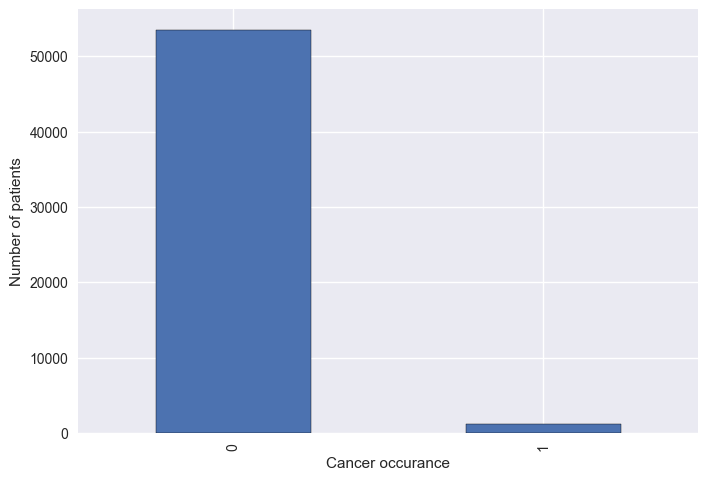

In [50]:
fig, ax = plt.subplots()
data['cancer'].value_counts().plot(ax=ax, kind='bar', xlabel='Cancer occurance', 
                                ylabel='Number of patients',
                                  edgecolor='k')
plt.show()

**Observaciones:** Resulta evidente que existe un gran imbalance de las clases, contando con mucho más imágenes de pacientes sin cáncer, esto representa un problema sustancial al momento de entrenar los modelos. Por lo tanto, se propone emplear ciertas técnicas que nos permitan solucionarlo y así obtener los mejores resultados

In [8]:
data[['patient_id', 'cancer', 'density', 'difficult_negative_case']]

,patient_id,cancer,density,difficult_negative_case
0,10006,0,NaN,False
1,10006,0,NaN,False
2,10006,0,NaN,False
3,10006,0,NaN,False
4,10011,0,NaN,True
...,...,...,...,...
54701,9973,0,C,False
54702,9989,0,C,False
54703,9989,0,C,False
54704,9989,0,C,True


El siguiente análisis se enfoca en considerar el parámetro de densidad que está relacionado directamente con las imágenes, por lo tanto es importante evaluar la densidad presente en el tejido ya que es un factor que determina la percepción de la imagen e influye con su contraste por lo que sería más díficl identificar algún hallazgo maligno como el cáncer.

In [9]:
density_A = data.loc[data['density']=='A']
density_A[['patient_id', 'cancer', 'density', 'difficult_negative_case']]

,patient_id,cancer,density,difficult_negative_case
510,10526,0,A,False
511,10526,0,A,False
512,10526,0,A,False
513,10526,0,A,False
514,10526,0,A,False
...,...,...,...,...
54574,9814,0,A,False
54575,9814,0,A,False
54576,9814,0,A,False
54577,9814,0,A,False


In [10]:
density_B = data.loc[data['density']=='B']
density_B[['patient_id', 'cancer', 'density', 'difficult_negative_case']]

,patient_id,cancer,density,difficult_negative_case
53,10102,0,B,False
54,10102,0,B,False
55,10102,0,B,False
56,10102,0,B,False
57,10102,0,B,True
...,...,...,...,...
54660,993,0,B,False
54694,997,0,B,False
54695,997,0,B,False
54696,997,0,B,False


In [11]:
density_C = data.loc[data['density']=='C']
density_C[['patient_id', 'cancer', 'density', 'difficult_negative_case']]

,patient_id,cancer,density,difficult_negative_case
12,10038,0,C,False
13,10038,0,C,False
14,10038,0,C,False
15,10038,0,C,False
16,10042,0,C,False
...,...,...,...,...
54701,9973,0,C,False
54702,9989,0,C,False
54703,9989,0,C,False
54704,9989,0,C,True


In [12]:
density_D = data.loc[data['density']=='D']
density_D[['patient_id', 'cancer', 'density', 'difficult_negative_case']]

,patient_id,cancer,density,difficult_negative_case
43,10095,0,D,False
44,10095,0,D,False
45,10095,0,D,False
46,10095,0,D,False
211,10243,0,D,False
...,...,...,...,...
54568,9808,0,D,False
54569,9808,0,D,False
54570,9808,0,D,False
54571,9808,0,D,False


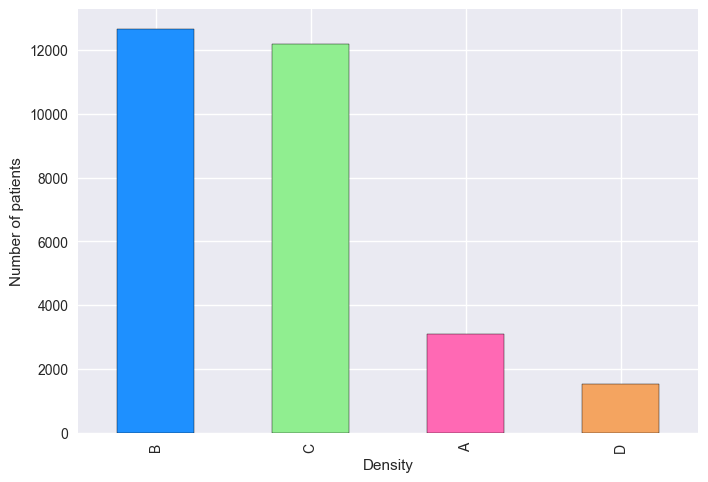

In [49]:
fig, ax = plt.subplots()
colors = ['dodgerblue', 'lightgreen', 'hotpink', 'sandybrown']
data['density'].value_counts().plot(ax=ax, kind='bar', xlabel='Density',
                                    ylabel='Number of patients',
                                   color=colors, edgecolor='k')
plt.show()

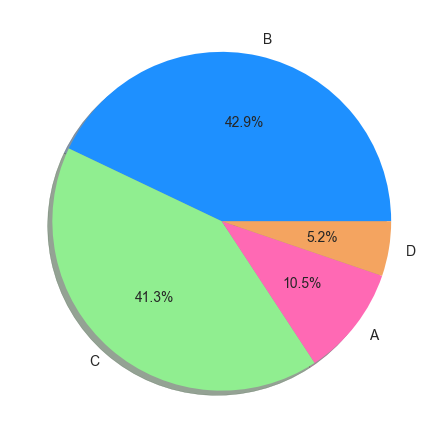

In [47]:
fig, ax = plt.subplots()
ax.pie(data['density'].value_counts(), labels=['B', 'C', 'A', 'D'], autopct='%1.1f%%',
      shadow=True, colors=colors);

In [15]:
# Densisty NaN values

data['density'].isnull()

0         True
1         True
2         True
3         True
4         True
         ...  
54701    False
54702    False
54703    False
54704    False
54705    False
Name: density, Length: 54706, dtype: bool

In [24]:
densisty_nan = data.loc[data['density'].isnull()]
densisty_nan[['density']]

,density
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
54689,NaN
54690,NaN
54691,NaN
54692,NaN
